In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
from scipy import stats
import numpy as np
%matplotlib inline


In [35]:
mouse_metadata=pd.read_csv("../data/Mouse_metadata.csv")
study_results=pd.read_csv("../data/Study_results.csv")


In [36]:
drug_regimen_results=pd.merge(mouse_metadata, study_results, on="Mouse ID")
drr=drug_regimen_results

In [37]:
drr=drr.rename(columns={"Age_months":"Age (months)"})
drr.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:

grouped_by_drug_df=drr.groupby(['Drug Regimen'])


 
volume_mean=grouped_by_drug_df['Tumor Volume (mm3)'].mean()

volume_median=grouped_by_drug_df['Tumor Volume (mm3)'].median()

volume_variance=grouped_by_drug_df['Tumor Volume (mm3)'].var()

volume_std_deviation=grouped_by_drug_df['Tumor Volume (mm3)'].std()

volume_sem=grouped_by_drug_df['Tumor Volume (mm3)'].sem()



t_volume_stats=pd.DataFrame({
    'Volume Mean': volume_mean,
    'Volume Median': volume_median,
    'Volume Variance': volume_variance,
    'Volume Standard Deviation': volume_std_deviation,
    'Volume SEM': volume_sem
})

t_volume_stats

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
d_data_points=grouped_by_drug_df['Drug Regimen'].count().sort_values(ascending=False)

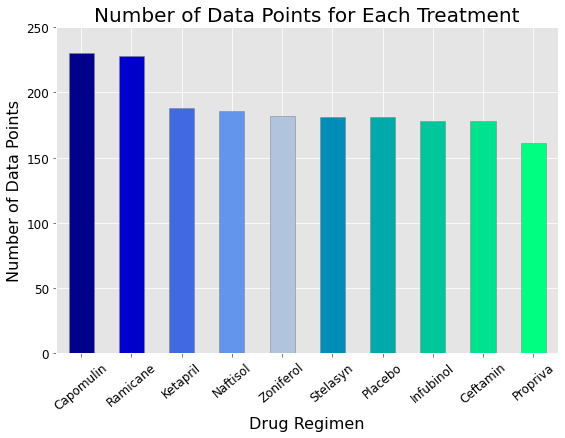

In [40]:
data_points_chart_1=d_data_points.plot(kind='bar', figsize=(9, 6), color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], alpha=1, edgecolor='gray', align="center")


data_points_chart_1.set_title('Number of Data Points for Each Treatment',fontsize=20)
data_points_chart_1.set_xlabel('Drug Regimen',fontsize=16, color='black')
data_points_chart_1.set_ylabel("Number of Data Points",fontsize=16, color='black')


for tick in data_points_chart_1.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_rotation(40)
    tick.set_color('black')
for tick in data_points_chart_1.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color('black')


plt.ylim(0, 250)

plt.show()


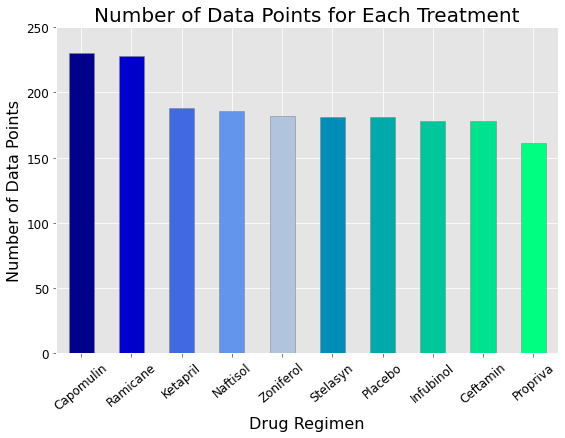

In [43]:

x_axis = np.arange(len(d_data_points))
data_points_chart_2=plt.bar(x_axis, d_data_points, color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], alpha=1, edgecolor='gray',align="center", width=.5)


drug_name=['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva'] # Find the way to use df for this step to eliminate manual drug inpt ***start with: drug_name=drr['Drug Regimen'].unique()***
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation=40, color='black', size=12)
plt.yticks(color='black', size=12)


plt.ylim(0, max(d_data_points)+20)


plt.xlim(-0.50, len(x_axis)-0.50)


plt.title('Number of Data Points for Each Treatment',fontsize=20)
plt.xlabel('Drug Regimen',fontsize=16, color='black')
plt.ylabel("Number of Data Points",fontsize=16, color='black')

plt.show()


In [44]:
plt.rcParams['figure.figsize']=(9,6)

In [45]:
total_mouse_count=drr['Mouse ID'].nunique()

total_female_mice=drr.loc[drr['Sex']=='Female',:].nunique().iloc[0]

total_male_mice=drr.loc[drr['Sex']=='Male',:].nunique().iloc[0]

male_pct=(total_male_mice/total_mouse_count)*100

female_pct=(total_female_mice/total_mouse_count)*100

distribution_by_sex_df=pd.DataFrame({
    'Distribution': [male_pct, female_pct]},
    index=['Male','Female'])

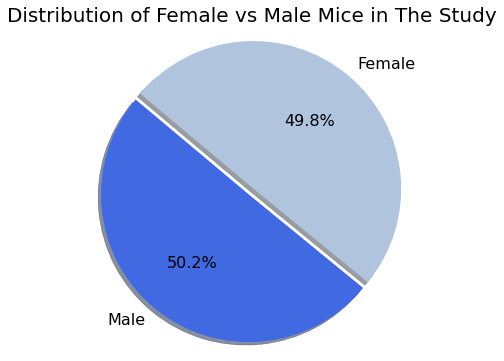

In [46]:
colors=['royalblue','lightsteelblue']
explode=(0,0.05)
pie_1=distribution_by_sex_df.plot(kind="pie", y='Distribution', figsize=(6,6), colors=colors,
                                  startangle=140, explode=explode, shadow=True, fontsize=16,
                                  autopct="%1.1f%%")
pie_1.set_title('Distribution of Female vs Male Mice in The Study', fontsize=20)
pie_1.set_ylabel('')
plt.axis('equal')
plt.legend('',frameon=False)

plt.show()

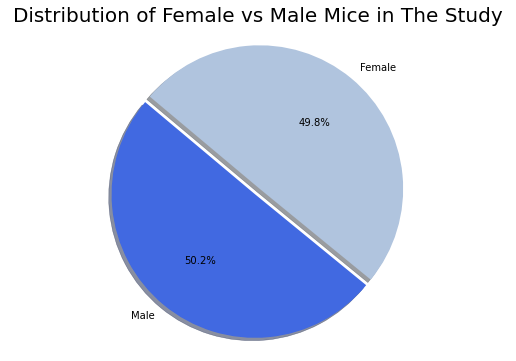

In [47]:
explode=(0,0.05)
colors=['royalblue','lightsteelblue']
data=distribution_by_sex_df['Distribution']
pie_2=plt.pie(data, colors=colors, explode=explode, shadow=True, startangle=140,
              labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title('Distribution of Female vs Male Mice in The Study', fontsize=20)

plt.axis("equal")
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size']=(16)

plt.show()

In [48]:
new_drr_df=drr[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

In [49]:
sorted_mouseid_timepoint_df=new_drr_df.sort_values(['Mouse ID','Timepoint'], ascending=False) # Sort new dataframe by columns 'Mouse ID' and 'Timepoint'.
sorted_mouseid_timepoint_df

no_dupl_sorted_df=sorted_mouseid_timepoint_df.drop_duplicates(subset='Mouse ID') # Drop duplicates in column 'Mouse ID' to leave only IDs with final timepoints (*** this can be used as well--> df.drop_duplicates(subset='Mouse ID', keep='first')***).


In [50]:
capomulin_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Capomulin']
capomulin_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.159220
440,i557,Capomulin,45,47.685963
204,i738,Capomulin,45,37.311846
337,j119,Capomulin,45,38.125164
317,j246,Capomulin,35,38.753265
380,l509,Capomulin,45,41.483008


In [51]:
capomulin_vol=capomulin_final_t_vol_df['Tumor Volume (mm3)']

capomulin_quartiles = capomulin_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)


In [52]:
ramicane_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Ramicane']
ramicane_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
327,a411,Ramicane,45,38.407618
430,a444,Ramicane,45,43.047543
214,a520,Ramicane,45,38.810366
174,a644,Ramicane,45,32.978522
289,c458,Ramicane,30,38.342008
154,c758,Ramicane,45,33.397653
272,d251,Ramicane,45,37.311236
400,e662,Ramicane,45,40.659006
49,g791,Ramicane,45,29.128472
184,i177,Ramicane,45,33.562402


In [53]:
ramicane_vol=ramicane_final_t_vol_df['Tumor Volume (mm3)']

ramicane_quartiles = ramicane_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

In [54]:
infubinol_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Infubinol']
infubinol_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
530,a577,Infubinol,30,57.031862
540,a685,Infubinol,45,66.083066
637,c139,Infubinol,45,72.226731
669,c326,Infubinol,5,36.321346
742,c895,Infubinol,30,60.969711
800,e476,Infubinol,45,62.435404
834,f345,Infubinol,45,60.918767
949,i386,Infubinol,40,67.289621


In [55]:
infubinol_vol=infubinol_final_t_vol_df['Tumor Volume (mm3)']

infubinol_quartiles = infubinol_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

In [56]:
ceftamin_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Ceftamin']
ceftamin_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
493,a275,Ceftamin,45,62.999356
594,b447,Ceftamin,0,45.000000
600,b487,Ceftamin,25,56.057749
617,b759,Ceftamin,30,55.742829
840,f436,Ceftamin,15,48.722078
940,h531,Ceftamin,5,47.784682
993,j296,Ceftamin,45,61.849023
1033,k210,Ceftamin,45,68.923185
1112,l471,Ceftamin,45,67.748662
1119,l490,Ceftamin,30,57.918381


In [57]:
ceftamin_vol=ceftamin_final_t_vol_df['Tumor Volume (mm3)']

ceftamin_quartiles = ceftamin_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

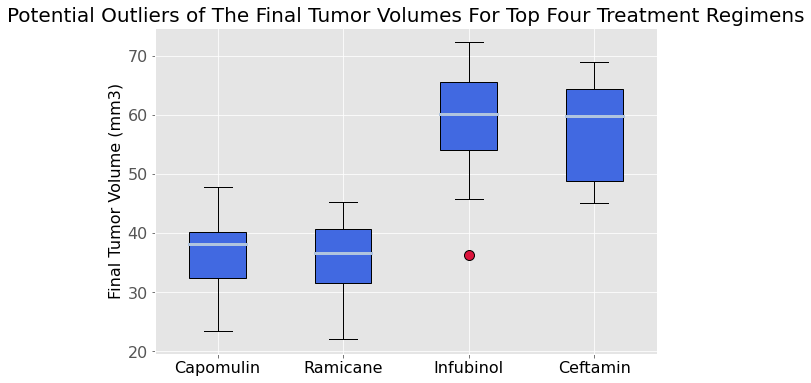

In [58]:
capomulin_vol=capomulin_final_t_vol_df['Tumor Volume (mm3)']
ramicane_vol=ramicane_final_t_vol_df['Tumor Volume (mm3)']
infubinol_vol=infubinol_final_t_vol_df['Tumor Volume (mm3)']
ceftamin_vol=ceftamin_final_t_vol_df['Tumor Volume (mm3)']

volumes=[capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]

fig, ax=plt.subplots(1, figsize=(9, 6))
bp=ax.boxplot(volumes, patch_artist=True)
ax.set_title('Potential Outliers of The Final Tumor Volumes For Top Four Treatment Regimens', fontsize=20)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=16, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=16, color='black')

for box in bp['boxes']:
    box.set(facecolor='royalblue')

for median in bp['medians']:
    median.set(color='lightsteelblue', linewidth=3)

for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='crimson', alpha=1)

plt.show()

In [59]:
target_mouse_sorted=sorted_mouseid_timepoint_df.loc[sorted_mouseid_timepoint_df['Mouse ID']=='s185',:]
target_mouse=target_mouse_sorted.sort_values('Timepoint')

target_mouse_plot=target_mouse[['Timepoint','Tumor Volume (mm3)']]

target_mouse_plot=target_mouse_plot.set_index('Timepoint')

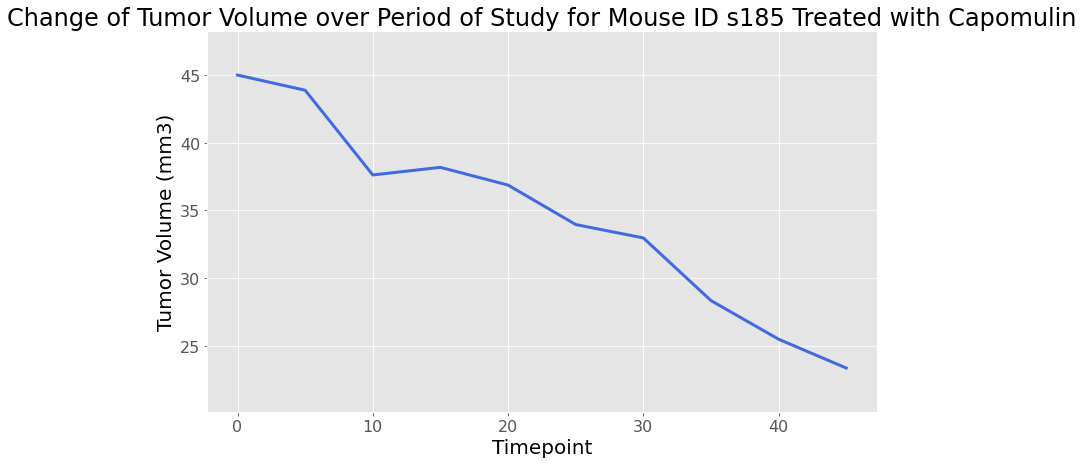

In [60]:
target_mouse_plot.plot(linewidth=3, color='royalblue', figsize=(12, 7))

plt.title('Change of Tumor Volume over Period of Study for Mouse ID s185 Treated with Capomulin', fontsize=24)
plt.xlabel('Timepoint', fontsize=20, color='black')
plt.ylabel('Tumor Volume (mm3)', fontsize=20, color='black')
plt.legend('',frameon=False)
plt.axis("equal")

plt.show()

In [61]:
new_drr2_df=drr[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]

capomulin_weight_df=new_drr2_df[new_drr2_df['Drug Regimen'] == 'Capomulin']

av_t_vol=capomulin_weight_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

av_t_vol=av_t_vol.reset_index()

av_t_vol=av_t_vol.rename(columns={'Tumor Volume (mm3)':'Avg Tumor Volume (mm3)'})

capomulin_weight2_df=capomulin_weight_df[['Mouse ID', 'Weight (g)']].drop_duplicates(subset='Mouse ID')

mouse_avg_t_vol_weight_df=pd.merge(capomulin_weight2_df, av_t_vol, on="Mouse ID")
mouse_avg_t_vol_weight_df.sort_values('Mouse ID').head()

,Mouse ID,Weight (g),Avg Tumor Volume (mm3)
14,b128,22,41.963636
13,b742,21,40.083699
3,f966,17,36.505973
11,g288,19,41.990097
19,g316,22,44.613344


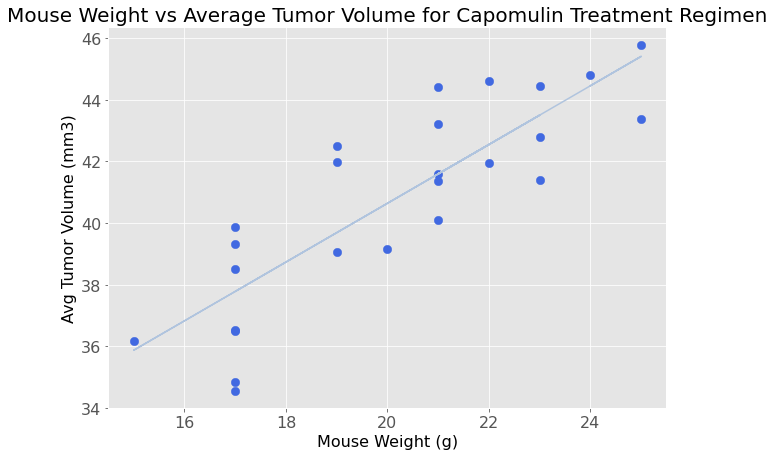

In [62]:
plt.figure(figsize=(10,7))
plt.scatter(mouse_avg_t_vol_weight_df.iloc[:,1],mouse_avg_t_vol_weight_df.iloc[:,2], color='royalblue', s=[70], alpha=1)
plt.xlabel('Mouse Weight (g)', fontsize=16, color='black')
plt.ylabel('Avg Tumor Volume (mm3)', fontsize=16, color='black')
#size=[70]
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment Regimen', fontsize=20)

x_values=mouse_avg_t_vol_weight_df['Weight (g)']
y_values=mouse_avg_t_vol_weight_df['Avg Tumor Volume (mm3)']
(slope, intercept,  rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,'lightsteelblue')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.show()


In [63]:
mouse_weight=mouse_avg_t_vol_weight_df.iloc[:,1]
volume=mouse_avg_t_vol_weight_df.iloc[:,2]
correlation = sts.pearsonr(mouse_weight,volume)